<a href="https://colab.research.google.com/github/laelynette/CPE-313/blob/main/Using_Tensorflow_with_a_Real_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# CPE 313 : Advanced Machine Learning with Deep Learning
## HOA 1.1 Using Tensorflow with a Real Dataset

*   Name: Castillo, Maria Antonette

---



# Linear Regression with a Real Dataset

This Colab uses a real dataset to predict the prices of houses in California.   






## Learning Objectives:

After doing this Colab, you'll know how to do the following:

* Demonstrate csv file manipulation using Pandas.
* Examine a given data.
* Experiment with different features in building a model.
* Demonstrate tuning a model's hyperparameters.

## The Dataset
  
The [dataset for this exercise](https://developers.google.com/machine-learning/crash-course/california-housing-data-description) is based on 1990 census data from California. The dataset is old but still provides a great opportunity to learn about machine learning programming.

## Import relevant modules

The following hidden code cell imports the necessary code to run the code in the rest of this Colaboratory.

In [ ]:
#@title Import relevant modules
import pandas as pd
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import layers

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

## The dataset

Datasets are often stored on disk or at a URL in [.csv format](https://wikipedia.org/wiki/Comma-separated_values).

A well-formed .csv file contains column names in the first row, followed by many rows of data.  A comma divides each value in each row. For example, here are the first five rows of the .csv file holding the California Housing Dataset:

```
"longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"
-114.310000,34.190000,15.000000,5612.000000,1283.000000,1015.000000,472.000000,1.493600,66900.000000
-114.470000,34.400000,19.000000,7650.000000,1901.000000,1129.000000,463.000000,1.820000,80100.000000
-114.560000,33.690000,17.000000,720.000000,174.000000,333.000000,117.000000,1.650900,85700.000000
-114.570000,33.640000,14.000000,1501.000000,337.000000,515.000000,226.000000,3.191700,73400.000000
```



### Load the .csv file into a pandas DataFrame

This Colab, like many machine learning programs, gathers the .csv file and stores the data in memory as a pandas Dataframe.  Pandas is an open source Python library.  The primary datatype in pandas is a DataFrame.  You can imagine a pandas DataFrame as a spreadsheet in which each row is identified by a number and each column by a name. Pandas is itself built on another open source Python library called NumPy. If you aren't familiar with these technologies, please view these two quick tutorials:

*   [NumPy](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/numpy_ultraquick_tutorial.ipynb?utm_source=linearregressionreal-colab&utm_medium=colab&utm_campaign=colab-external&utm_content=numpy_tf2-colab&hl=en)
*   [Pandas DataFrames](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb?utm_source=linearregressionreal-colab&utm_medium=colab&utm_campaign=colab-external&utm_content=pandas_tf2-colab&hl=en)

The following code cell imports the .csv file into a pandas DataFrame and scales the values in the label (`median_house_value`):

In [ ]:
# Import the dataset.
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

# Scale the label.
training_df["median_house_value"] /= 1000.0

# Print the first rows of the pandas DataFrame.
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


Scaling `median_house_value` puts the value of each house in units of thousands. Scaling will keep loss values and learning rates in a friendlier range.  

Although scaling a label is usually *not* essential, scaling features in a multi-feature model usually *is* essential.

## Examine the dataset

A large part of most machine learning projects is getting to know your data. The pandas API provides a `describe` function that outputs the following statistics about every column in the DataFrame:

* `count`, which is the number of rows in that column. Ideally, `count` contains the same value for every column.

* `mean` and `std`, which contain the mean and standard deviation of the values in each column.

* `min` and `max`, which contain the lowest and highest values in each column.

* `25%`, `50%`, `75%`, which contain various [quantiles](https://developers.google.com/machine-learning/glossary/#quantile).

In [ ]:
# Get statistics on the dataset.
training_df.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


### Task 1: Identify anomalies in the dataset

Do you see any anomalies (strange values) in the data?

***The standard deviation of some features are quite large which means that the values are more spread out from the mean. Example of that is the total bedrooms and populations. Upon observation, their maximum values are too far away from the 75th percentile. This indicate that there might be an outliers in the dataset.***

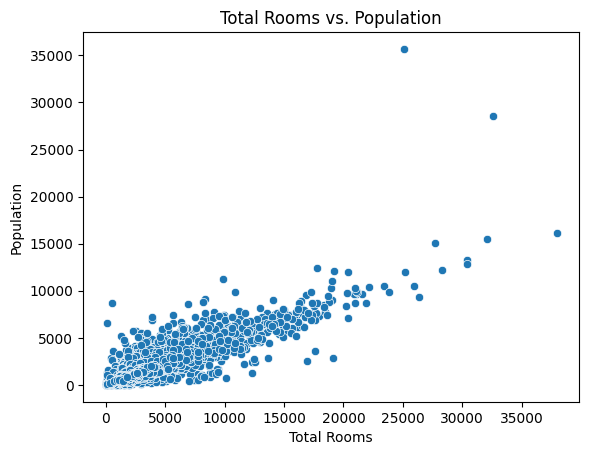

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='total_rooms', y='population', data=training_df)

# Set plot labels and title
plt.xlabel('Total Rooms')
plt.ylabel('Population')
plt.title('Total Rooms vs. Population')

# Show the plot
plt.show()


***The graph above shows that there's a positive correlation between the population and total rooms. However, there are some data that are too distant from other values which can be considered as an outlier.***

In [ ]:
#@title Double-click to view a possible answer.

# The maximum value (max) of several columns seems very
# high compared to the other quantiles. For example,
# example the total_rooms column. Given the quantile
# values (25%, 50%, and 75%), you might expect the
# max value of total_rooms to be approximately
# 5,000 or possibly 10,000. However, the max value
# is actually 37,937.

# When you see anomalies in a column, become more careful
# about using that column as a feature. That said,
# anomalies in potential features sometimes mirror
# anomalies in the label, which could make the column
# be (or seem to be) a powerful feature.
# Also, as you will see later in the course, you
# might be able to represent (pre-process) raw data
# in order to make columns into useful features.

## Define functions that build and train a model

The following code defines two functions:

  * `build_model(my_learning_rate)`, which builds a randomly-initialized model.
  * `train_model(model, feature, label, epochs)`, which trains the model from the examples (feature and label) you pass.

Since you don't need to understand model building code right now, we've hidden this code cell.  You may optionally double-click the following headline to see the code that builds and trains a model.

In [ ]:
def build_model(feature, my_learning_rate):
    feature_normalizer = layers.Normalization(input_shape=[1,], axis=None) # scaling the feature
    feature_normalizer.adapt(feature)
    model = tf.keras.Sequential([
                      feature_normalizer,
                      layers.Dense(units=1)]) # single neuron for linear regression
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate), # RMS optimizer with learning rate
                  loss="mean_squared_error", metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

In [ ]:
def train_model(model, feature, label, epochs, batch_size): # function to train the model
    model.fit(x=feature, y=label, epochs=epochs, batch_size=batch_size)
    return model

## Define plotting functions

The following [matplotlib](https://developers.google.com/machine-learning/glossary/#matplotlib) functions create the following plots:

*  a scatter plot of the feature vs. the label, and a line showing the output of the trained model
*  a loss curve

You may optionally double-click the headline to see the matplotlib code, but note that writing matplotlib code is not an important part of learning ML programming.

In [ ]:
def plot_the_model(model, feature, label):
  plt.figure(figsize=(8, 4))
  plt.scatter(feature, label, label='Actual Data', alpha=0.5)
  plt.xlabel('Feature')
  plt.ylabel('Median House Value')
  plt.title('Specific Feature vs. Median House Value')

  predictions = model.predict(feature)
  plt.plot(feature, predictions, color='red', label='Model Output')
  plt.legend()
  plt.show()


def plot_loss_curve(epochs, rmse):
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, epochs + 1), rmse, label='Root Mean Squared Error (RMSE)')
    plt.xlabel('Epochs')
    plt.ylabel('RMSE')
    plt.title('Loss Curve')
    plt.legend()
    plt.show()

## Call the model functions

An important part of machine learning is determining which [features](https://developers.google.com/machine-learning/glossary/#feature) correlate with the [label](https://developers.google.com/machine-learning/glossary/#label). For example, real-life home-value prediction models typically rely on hundreds of features and synthetic features. However, this model relies on only one feature. For now, you'll arbitrarily use `total_rooms` as that feature.


In [ ]:
my_feature = np.array(training_df['total_rooms'])
my_label = np.array(training_df['median_house_value'])
learning_rate = 0.1
training_epochs = 50
batch_size = 20
my_model = build_model(my_feature, learning_rate)
trained_model = train_model(my_model, my_feature, my_label, training_epochs, batch_size)

# Get the training loss (RMSE) for each epoch
history = trained_model.history.history
rmse = history['root_mean_squared_error']

Epoch 1/50
850/850 [==============================] - 2s 2ms/step - loss: 40998.9648 - root_mean_squared_error: 202.4820
Epoch 2/50
850/850 [==============================] - 2s 2ms/step - loss: 20544.3340 - root_mean_squared_error: 143.3329
Epoch 3/50
850/850 [==============================] - 2s 2ms/step - loss: 13704.6982 - root_mean_squared_error: 117.0671
Epoch 4/50
850/850 [==============================] - 1s 1ms/step - loss: 13226.5635 - root_mean_squared_error: 115.0068
Epoch 5/50
850/850 [==============================] - 2s 3ms/step - loss: 13224.6416 - root_mean_squared_error: 114.9984
Epoch 6/50
850/850 [==============================] - 1s 2ms/step - loss: 13226.0791 - root_mean_squared_error: 115.0047
Epoch 7/50
850/850 [==============================] - 1s 1ms/step - loss: 13225.4521 - root_mean_squared_error: 115.0020
Epoch 8/50
850/850 [==============================] - 1s 1ms/step - loss: 13224.7881 - root_mean_squared_error: 114.9991
Epoch 9/50
850/850 [============

532/532 [==============================] - 1s 2ms/step


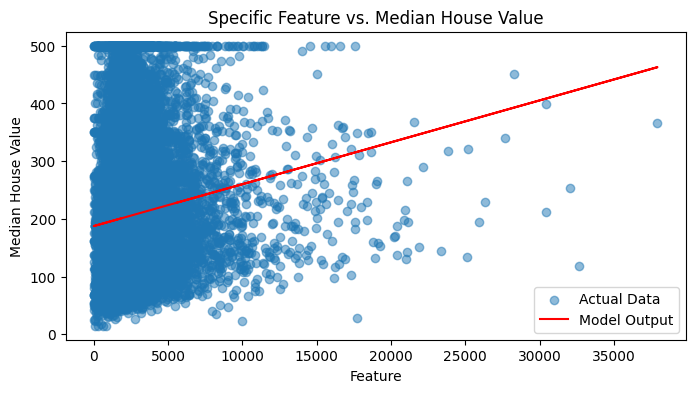

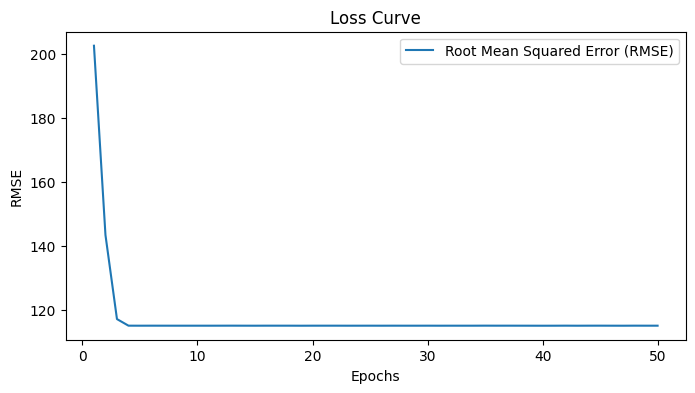

In [ ]:
plot_the_model(trained_model, my_feature, my_label)
plot_loss_curve(training_epochs, rmse)

***Looking at the graph above, it shows that with linear regression model, there's a positive correlation between total rooms and the house value. This  means that as the number of rooms increases, the predicted value of house also increases. Moreover, in the loss curve graph, the RMSE is at 200 initially but decreases as the model undergoes more training epochs. It plateus around 115 when increasing of epochs doesn't significantly reduce the error.***

A certain amount of randomness plays into training a model. Consequently, you'll get different results each time you train the model. That said, given the dataset and the hyperparameters, the trained model will generally do a poor job describing the feature's relation to the label.

## Use the model to make predictions

You can use the trained model to make predictions. In practice, [you should make predictions on examples that are not used in training](https://developers.google.com/machine-learning/crash-course/training-and-test-sets/splitting-data). However, for this exercise, you'll just work with a subset of the same training dataset. A later Colab exercise will explore ways to make predictions on examples not used in training.

First, run the following code to define the house prediction function:

In [ ]:
def predict_house_values(n, feature, label, model):
    predicted_values = model.predict(feature)

    print("feature   label          predicted")
    print("  value   value          value")
    print("          in thousand$   in thousand$")
    print("--------------------------------------")

    for i in range(n):
        print ("%5.0f %6.0f %15.0f" % (feature[i], label[i], predicted_values[i][0]))

Now, invoke the house prediction function on 10 examples:

In [ ]:
predict_house_values(10, my_feature, my_label, trained_model)

532/532 [==============================] - 1s 1ms/step
feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 5612     67             228
 7650     80             243
  720     86             193
 1501     73             198
 1454     66             198
 1387     74             198
 2907     82             209
  812     48             193
 4789     58             222
 1497     48             198


### Task 2: Judge the predictive power of the model

Look at the preceding table. How close is the predicted value to the label value?  In other words, does your model accurately predict house values?  

***Comparing the actual value to predicted value, there's an obvious big difference betweeen them. The model struggle to predict the values accurately. The choice of hyperparameters like learning rate, number of epochs, and batch size could also be a factor. Learning rate defines the step size the model takes when learning, number of epochs determine how many times the model will see and learn from the entire dataset, and batch size refers to the number of samples used in one iteration.***

## Task 3: Try a different feature

The `total_rooms` feature had only a little predictive power. Would a different feature have greater predictive power?  Try using `population` as the feature instead of `total_rooms`.

Note: When you change features, you might also need to change the hyperparameters.

In [ ]:
my_feature = np.array(training_df['population'])  # Replace the ? with population or possibly
                                                   # a different column name.

# Experiment with the hyperparameters.
learning_rate = 0.01
training_epochs =50
batch_size = 20

# Don't change anything below this line.
my_model = build_model(my_feature, learning_rate)
trained_model = train_model(my_model, my_feature, my_label, training_epochs, batch_size)

history = trained_model.history.history
rmse = history['root_mean_squared_error']

Epoch 1/50
850/850 [==============================] - 2s 1ms/step - loss: 54660.2539 - root_mean_squared_error: 233.7953
Epoch 2/50
850/850 [==============================] - 1s 1ms/step - loss: 51313.5391 - root_mean_squared_error: 226.5249
Epoch 3/50
850/850 [==============================] - 1s 1ms/step - loss: 48100.3398 - root_mean_squared_error: 219.3179
Epoch 4/50
850/850 [==============================] - 1s 1ms/step - loss: 45044.7891 - root_mean_squared_error: 212.2376
Epoch 5/50
850/850 [==============================] - 1s 2ms/step - loss: 42130.4531 - root_mean_squared_error: 205.2570
Epoch 6/50
850/850 [==============================] - 2s 2ms/step - loss: 39361.1992 - root_mean_squared_error: 198.3966
Epoch 7/50
850/850 [==============================] - 2s 2ms/step - loss: 36726.4688 - root_mean_squared_error: 191.6415
Epoch 8/50
850/850 [==============================] - 1s 1ms/step - loss: 34245.5156 - root_mean_squared_error: 185.0554
Epoch 9/50
850/850 [============

532/532 [==============================] - 1s 1ms/step


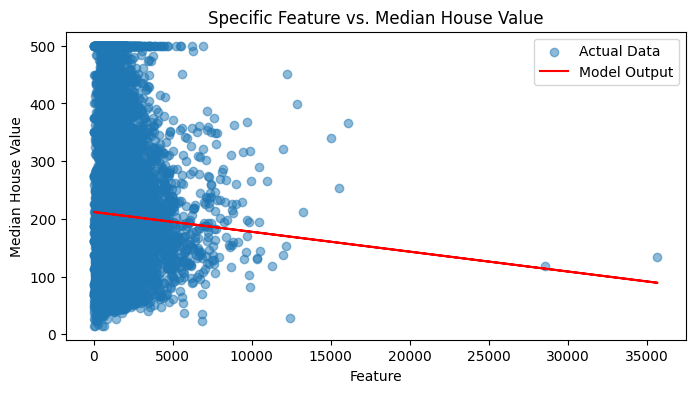

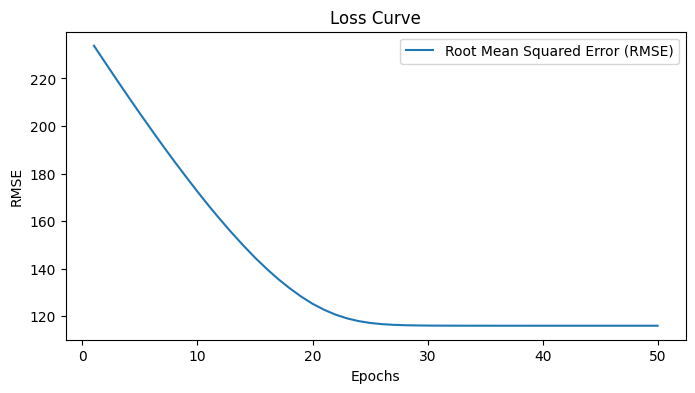

In [ ]:
plot_the_model(trained_model, my_feature, my_label)
plot_loss_curve(training_epochs, rmse)

In [ ]:
predict_house_values(10, my_feature, my_label, trained_model)

532/532 [==============================] - 1s 1ms/step
feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
 1015     67             209
 1129     80             208
  333     86             211
  515     73             210
  624     66             210
  671     74             210
 1841     82             206
  375     48             211
 3134     58             201
  787     48             209


Did `population` produce better predictions than `total_rooms`?

***No, the model still struggles to predict the value of house even though we changed the feature. The result of RMSE is almost similar with total_rooms, which is 115 as the lowest. The RMSE also plateus around 30 epochs. This could mean that the model's performance is almost consistent accross the two features, and did not improve the predictive accuracy. I also tried to experiment with different value of hyperparameters, but some result just got worse.***

## Task 4: Define a synthetic feature

You have determined that `total_rooms` and `population` were not useful features.  That is, neither the total number of rooms in a neighborhood nor the neighborhood's population successfully predicted the median house price of that neighborhood. Perhaps though, the *ratio* of `total_rooms` to `population` might have some predictive power. That is, perhaps block density relates to median house value.

To explore this hypothesis, do the following:

1. Create a [synthetic feature](https://developers.google.com/machine-learning/glossary/#synthetic_feature) that's a ratio of `total_rooms` to `population`. (If you are new to pandas DataFrames, please study the [Pandas DataFrame Ultraquick Tutorial](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb?utm_source=linearregressionreal-colab&utm_medium=colab&utm_campaign=colab-external&utm_content=pandas_tf2-colab&hl=en).)
2. Tune the three hyperparameters.
3. Determine whether this synthetic feature produces
   a lower loss value than any of the single features you
   tried earlier in this exercise.

In [ ]:
training_df["rooms_per_person"] = training_df['total_rooms'] / training_df['population']

my_feature = my_feature = np.array(training_df["rooms_per_person"])

learning_rate = 0.01
training_epochs = 20
batch_size = 50

my_model = build_model(my_feature, learning_rate)
trained_model = train_model(my_model, my_feature, my_label, training_epochs, batch_size)

history = trained_model.history.history
rmse = history['root_mean_squared_error']

Epoch 1/20
340/340 [==============================] - 1s 2ms/step - loss: 55635.5156 - root_mean_squared_error: 235.8718
Epoch 2/20
340/340 [==============================] - 1s 2ms/step - loss: 54169.7734 - root_mean_squared_error: 232.7440
Epoch 3/20
340/340 [==============================] - 0s 1ms/step - loss: 52729.4648 - root_mean_squared_error: 229.6290
Epoch 4/20
340/340 [==============================] - 1s 2ms/step - loss: 51325.8047 - root_mean_squared_error: 226.5520
Epoch 5/20
340/340 [==============================] - 1s 2ms/step - loss: 49951.7031 - root_mean_squared_error: 223.4988
Epoch 6/20
340/340 [==============================] - 1s 2ms/step - loss: 48616.6758 - root_mean_squared_error: 220.4919
Epoch 7/20
340/340 [==============================] - 1s 2ms/step - loss: 47307.8828 - root_mean_squared_error: 217.5038
Epoch 8/20
340/340 [==============================] - 1s 2ms/step - loss: 46031.3320 - root_mean_squared_error: 214.5491
Epoch 9/20
340/340 [============

532/532 [==============================] - 1s 1ms/step


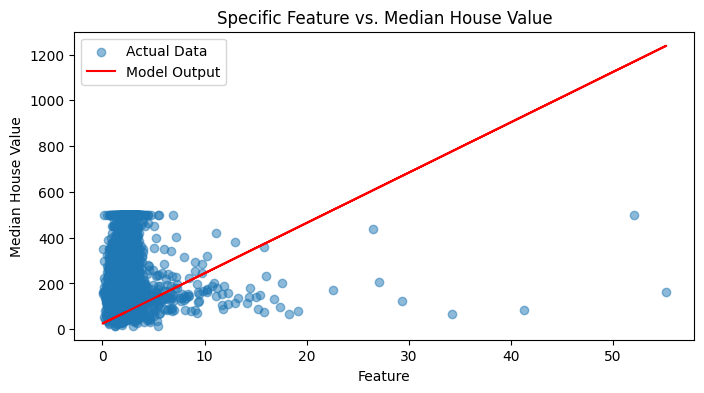

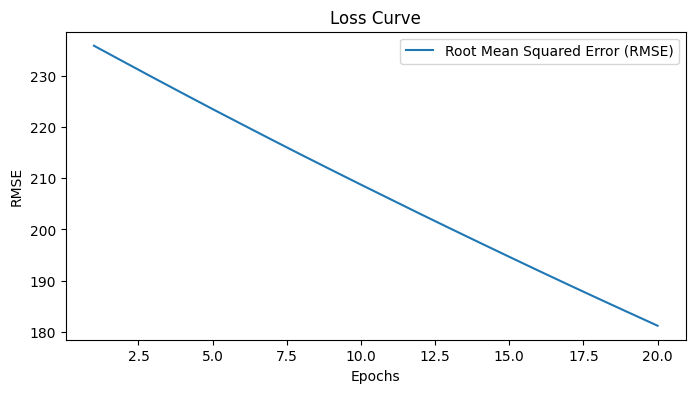

In [ ]:
plot_the_model(trained_model, my_feature, my_label)
plot_loss_curve(training_epochs, rmse)

In [ ]:
predict_house_values(15, my_feature, my_label, trained_model)

532/532 [==============================] - 1s 1ms/step
feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
    6     67             146
    7     80             173
    2     86              72
    3     73              88
    2     66              75
    2     74              70
    2     82              59
    2     48              72
    2     58              58
    2     48              66
    2     86              58
    2     62              61
    2     49              73
    2     70              65
    2     45              58


***Based on the graph, as the number of ratio of total rooms to population increases, the predicted house value also rises. Moreover, observing the loss curve value, the RMSE continously decreases as we add more epochs. This implies that the model consistently improve its performace over time. Looking at the table, the predicted values are somewhat close to the actual values. It's actually better compared to the two models earlier.***

Based on the loss values, this synthetic feature produces a better model than the individual features you tried in Task 2 and Task 3. However, the model still isn't creating great predictions.


## Task 5. Find feature(s) whose raw values correlate with the label

So far, we've relied on trial-and-error to identify possible features for the model.  Let's rely on statistics instead.

A **correlation matrix** indicates how each attribute's raw values relate to the other attributes' raw values. Correlation values have the following meanings:

  * `1.0`: perfect positive correlation; that is, when one attribute rises, the other attribute rises.
  * `-1.0`: perfect negative correlation; that is, when one attribute rises, the other attribute falls.
  * `0.0`: no correlation; the two columns [are not linearly related](https://en.wikipedia.org/wiki/Correlation_and_dependence#/media/File:Correlation_examples2.svg).

In general, the higher the absolute value of a correlation value, the greater its predictive power. For example, a correlation value of -0.8 implies far more predictive power than a correlation of -0.2.

The following code cell generates the correlation matrix for attributes of the California Housing Dataset:

In [ ]:
# Generate a correlation matrix.
training_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_person
longitude,1.0,-0.9,-0.1,0.0,0.1,0.1,0.1,-0.0,-0.0,-0.1
latitude,-0.9,1.0,0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,0.1
housing_median_age,-0.1,0.0,1.0,-0.4,-0.3,-0.3,-0.3,-0.1,0.1,-0.1
total_rooms,0.0,-0.0,-0.4,1.0,0.9,0.9,0.9,0.2,0.1,0.1
total_bedrooms,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,-0.0,0.0,0.0
population,0.1,-0.1,-0.3,0.9,0.9,1.0,0.9,-0.0,-0.0,-0.1
households,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,0.0,0.1,-0.0
median_income,-0.0,-0.1,-0.1,0.2,-0.0,-0.0,0.0,1.0,0.7,0.2
median_house_value,-0.0,-0.1,0.1,0.1,0.0,-0.0,0.1,0.7,1.0,0.2
rooms_per_person,-0.1,0.1,-0.1,0.1,0.0,-0.1,-0.0,0.2,0.2,1.0


The correlation matrix shows nine potential features (including a synthetic
feature) and one label (`median_house_value`).  A strong negative correlation or strong positive correlation with the label suggests a potentially good feature.  

**Your Task:** Determine which of the nine potential features appears to be the best candidate for a feature?

***The best candidate for a feature is the median_income, since it has a positive correlation of 0.7 to the median house value. Meanwhile, the rest of the features have small correlation to the target feature. It also makes sense that the income positively affects the value of house. Individuals with higher incomes might be more likely to afford a higher priced houses.***

Correlation matrices don't tell the entire story. In later exercises, you'll find additional ways to unlock predictive power from potential features.

**Note:** Using `median_income` as a feature may raise some ethical and fairness
issues. Towards the end of the course, we'll explore ethical and fairness issues.

**Conclusion:**

***In this activity, I learned how to create linear regression model using the keras and tensorflow. I also explored the different hyperparameters and observed its impact to the model's performance. I learned that adjusting the learning rate, batch size, and epochs influence the predictions of the target feature. However, I also encountered poor performance when using some feature, but it somewhat got better when I used the synthetic feature or the ratio of the total rooms to the population.***

In [ ]:
#@title Copyright 2020 Google LLC. Double-click here for license information.
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License. :)